In [1]:
train_path = '/home/ugrads/a/aa_ron_su/JSS_SUBMISSION_NEW/data/till_end_mimic_iv_extra_features_train.csv'
test_path = '/home/ugrads/a/aa_ron_su/JSS_SUBMISSION_NEW/data/till_end_mimic_iv_extra_features_test.csv'
radiology_path = '/data/datasets/mimiciv_notes/physionet.org/files/mimic-iv-note/2.2/note/radiology.csv.gz'
discharge_path = '/data/datasets/mimiciv_notes/physionet.org/files/mimic-iv-note/2.2/note/discharge.csv'
radiology_detail_path = '/data/datasets/mimiciv_notes/physionet.org/files/mimic-iv-note/2.2/note/radiology_detail.csv.gz'
discharge_detail_path = '/data/datasets/mimiciv_notes/physionet.org/files/mimic-iv-note/2.2/note/discharge_detail.csv'

In [2]:
import pandas as pd
radiology = pd.read_csv(radiology_path)
discharge = pd.read_csv(discharge_path)
radiology_detail = pd.read_csv(radiology_detail_path)
discharge_detail = pd.read_csv(discharge_detail_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
subject_cohort = pd.concat([train, test])['subject'].unique()

In [ ]:
radiology_detail

In [ ]:
radiology

In [8]:
def populate_word_counts(notes):
    notes['word_count'] = notes['text'].apply(lambda x: len(x.split()))

def summary(notes, subject_cohort):
    def _count_subjects_with_notes():
        mask = notes['subject_id'].drop_duplicates().isin(subject_cohort)
        return mask.sum()
        # figure out how many notes apply to each subject id

    print(f"there are {len(notes)} notes")
    print(f"there are on average {notes['word_count'].mean() :.2f} words per note. The min and max are {notes['word_count'].min()} and {notes['word_count'].max()} words")
    count = _count_subjects_with_notes()
    print(f"from our cohort, there are {count} subjects with notes out of {len(subject_cohort)} subjects. {count / len(subject_cohort) * 100 :.2f}% of subjects have notes")
    

In [9]:
populate_word_counts(radiology)
populate_word_counts(discharge)

In [12]:
pd.Series(subject_cohort)

0        10000032.0
1        10000980.0
2        10001217.0
3        10001725.0
4        10002013.0
            ...    
29103    19992425.0
29104    19994730.0
29105    19998770.0
29106    19998878.0
29107    19999068.0
Length: 29108, dtype: float64

In [39]:
def populate_note_count(subject_cohort, notes):
    mask = notes['subject_id'].isin(subject_cohort)
    notes['in_cohort'] = mask
    return notes

def generate_subject_note_pivot(notes):
    return notes[['in_cohort', 'subject_id']].groupby('subject_id').apply('count')


radiology = populate_note_count(subject_cohort=subject_cohort, notes=radiology)
discharge = populate_note_count(subject_cohort=subject_cohort, notes=discharge)

radiology_pivot = generate_subject_note_pivot(radiology)
discharge_pivot = generate_subject_note_pivot(discharge)

In [49]:
radiology_pivot.sort_values('in_cohort', ascending = False, inplace=True)
discharge_pivot.sort_values('in_cohort', ascending = False, inplace=True)

In [ ]:
radiology_pivot

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.hist(radiology_pivot, bins=100, log=True)
ax.set_title('radiology_notes_per_subject')
plt.show()

In [ ]:
fig,ax = plt.subplots()
ax.hist(discharge_pivot, bins=100, log=True)
ax.set_title('discharge_notes_per_subject')
plt.show()

In [67]:
radiology_pivot.mean()

in_cohort    9.777131
dtype: float64

In [68]:
discharge_pivot.mean()

in_cohort    2.273885
dtype: float64

In [ ]:
pivot_table = pd.pivot_table(radiology, values='ICUSTAY_ID', index='SUBJECT_ID', aggfunc=pd.Series.nunique)
pivot_table = pivot_table.rename(columns={'ICUSTAY_ID': 'NUM_ICUSTAYS'})
pivot_table[pivot_table['NUM_ICUSTAYS'] > 3]

In [46]:
print("RADIOLOGY DATA SUMMARY:")
summary(radiology, subject_cohort)
print("\nDISCHARGE DATA SUMMARY:")
summary(discharge, subject_cohort)

RADIOLOGY DATA SUMMARY:
there are 2321355 notes
there are on average 168.73876335157698 words per note. The min and max are 1 and 3081 words
there are 27193 subjects with notes out of 29108 subjects. 93.42% of subjects have notes

DISCHARGE DATA SUMMARY:
there are 331794 notes
there are on average 1600.274299716089 words per note. The min and max are 44 and 9026 words
there are 27349 subjects with notes out of 29108 subjects. 93.96% of subjects have notes


<Axes: >

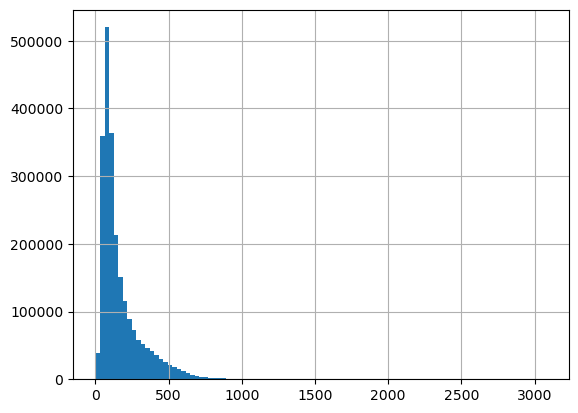

In [20]:
from matplotlib import pyplot
radiology['word_count'].hist(bins=100)

<Axes: >

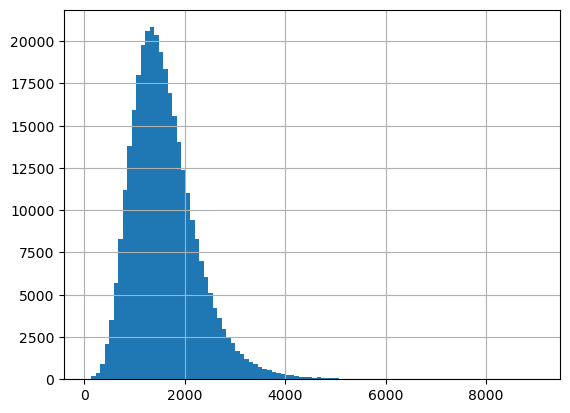

In [24]:
from matplotlib import pyplot
discharge['word_count'].hist(bins=100)

In [69]:
from convert_deid_tags import replace_list_of_notes

In [77]:
radiology.text.iloc[0:10]

0    EXAMINATION:  CHEST (PA AND LAT)\n\nINDICATION...
1    EXAMINATION:  LIVER OR GALLBLADDER US (SINGLE ...
2    INDICATION:  ___ HCV cirrhosis c/b ascites, hi...
3    EXAMINATION:  Ultrasound-guided paracentesis.\...
4    EXAMINATION:  Paracentesis\n\nINDICATION:  ___...
5    EXAMINATION:  ULTRASOUND INTERVENTIONAL PROCED...
6    EXAMINATION:  LIVER OR GALLBLADDER US (SINGLE ...
7    EXAMINATION:  CHEST (PA AND LAT)\n\nINDICATION...
8    EXAMINATION:  Ultrasound-guided paracentesis.\...
9    EXAMINATION:  Ultrasound-guided paracentesis.\...
Name: text, dtype: object

In [90]:
tmp = replace_list_of_notes(radiology.text.tolist())

In [96]:
tmp == radiology.text.tolist()

True

In [100]:
view = discharge[discharge.text.str.contains('First Name|Last Name|Age over 90')]


In [102]:
view.text.iloc[0]

" \nName:  ___                     Unit No:   ___\n \nAdmission Date:  ___              Discharge Date:   ___\n \nDate of Birth:  ___             Sex:   M\n \nService: MEDICINE\n \nAllergies: \nNo Known Allergies / Adverse Drug Reactions\n \nAttending: ___.\n \nChief Complaint:\nConcern for pneumonia\n \nMajor Surgical or Invasive Procedure:\nBronchoscopy on ___\n\n \nHistory of Present Illness:\nMr. ___ is a ___ year old gentleman with a history of MDS - \nRefractory Anemia with Excess Blasts Type ___ s/p reduced \nintensity MRD allogeneic SCT now D+405 who presents from clinic \nwith concern for pneumonia.  \n\nHe has a complicated post-transplant history. He has had severe \nGVHD of the gut treated with prednisone and cyclosporine, \ncurrently maintained on 5mg prednisone daily and budesonide. He \nwas diagnosed with aspergillus and stenotrophomonas pneumonia on \nBAL on ___ and treated with levofloxacin and voriconazole, \nand then on ___ was started on posaconizole for fungal \npr

In [89]:
view.text.iloc[0]

'\n___ ___ ___\n\n\n\nOPERATIVE REPORT\n\n___.\nSigned Electronically by ___ on ___ ___ 12:24 ___\n\nName:  ___              ___ No:  ___\n\nService:                          Date:  ___\n\nDate of Birth:  ___        Sex:  F\n\nSurgeon:  ___, ___ ___\n\n\nCHIEF COMPLAINT:  Back pain.\n\nPREOPERATIVE DIAGNOSIS:  Compression fracture, L1.\n\nPOSTOPERATIVE DIAGNOSIS:  Compression fracture, L1.\n\nINDICATIONS FOR PROCEDURE:  The patient has back pain which is in the setting\nof L1 compression fracture.  She has done poorly with the medications, and\ncontinues to have quite significant severe pain.  Therefore, consideration was\ngiven to L1 kyphoplasty.\n\nDESCRIPTION OF PROCEDURE:  The patient was seen in the preop area.  Informed\nconsent was obtained.  Skin was marked.\n\nShe was brought to the radiology suite. MAC anesthesia was induced.  Skin was\nprepped and draped in a sterile fashion.  Time-out was performed per\nprotocol.  One gram of Ancef was given preprocedure.\n\nL1 level was vi